#Task 1

### Perform the necessary imports




In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

###Data Loading

In [33]:
# Load the dataset
file_path = 'listings_sm_1000_cleaned.csv'  # Update this path if necessary
df = pd.read_csv(file_path)

###EDA

In [34]:
# Display the number of rows and columns separately
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1000
Number of columns: 9


In [35]:
# Display data types of each column
print("\nData types of each column:\n", df.dtypes)


Data types of each column:
 id                          int64
accommodates                int64
bedrooms                  float64
beds                      float64
description                object
number_of_reviews           int64
num_host_response_rate    float64
num_price                 float64
cat_price                  object
dtype: object


In [36]:
#First 5 rows
df.head(5)

,id,accommodates,bedrooms,beds,description,number_of_reviews,num_host_response_rate,num_price,cat_price
0,43269141,2,1.0,1.0,"Welcome to the Sofi Stadium House, Room # 4 of...",34,100.0,115.0,low
1,41416518,2,1.0,1.0,"Discover the best of Los Angeles, with this on...",0,100.0,140.0,low
2,24918413,4,2.0,2.0,Experience Summer in this Beachside Californi...,1,100.0,425.0,high
3,45532645,4,2.0,2.0,"A spacious, modern & clean 2BD/2BA set inside ...",89,97.0,129.0,low
4,2478188,4,1.0,2.0,"A cozy home away from home, this private Los F...",177,100.0,160.0,high


#TASK2

In [37]:
#'description' is the feature and 'price_category' is the target
X = df['description']
y = df['cat_price']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (700,)
Test set size: (300,)


#TASK3

In [39]:
# Define the pipelines
pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', LinearSVC())
])

pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

In [40]:
# Train the models
pipeline_svc.fit(X_train, y_train)
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

#TASK4

In [41]:
# Make predictions
y_pred_svc = pipeline_svc.predict(X_test)
y_pred_lr = pipeline_lr.predict(X_test)


In [42]:
# Evaluate the models
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)


In [43]:
# Print the results
print("Linear SVC - Accuracy:", accuracy_svc)
print("Linear SVC - F1 Score:", f1_svc)

print("\nLogistic Regression - Accuracy:", accuracy_lr)
print("Logistic Regression - F1 Score:", f1_lr)



Linear SVC - Accuracy: 0.76
Linear SVC - F1 Score: 0.7599786657184763

Logistic Regression - Accuracy: 0.7566666666666667
Logistic Regression - F1 Score: 0.7566585547443634


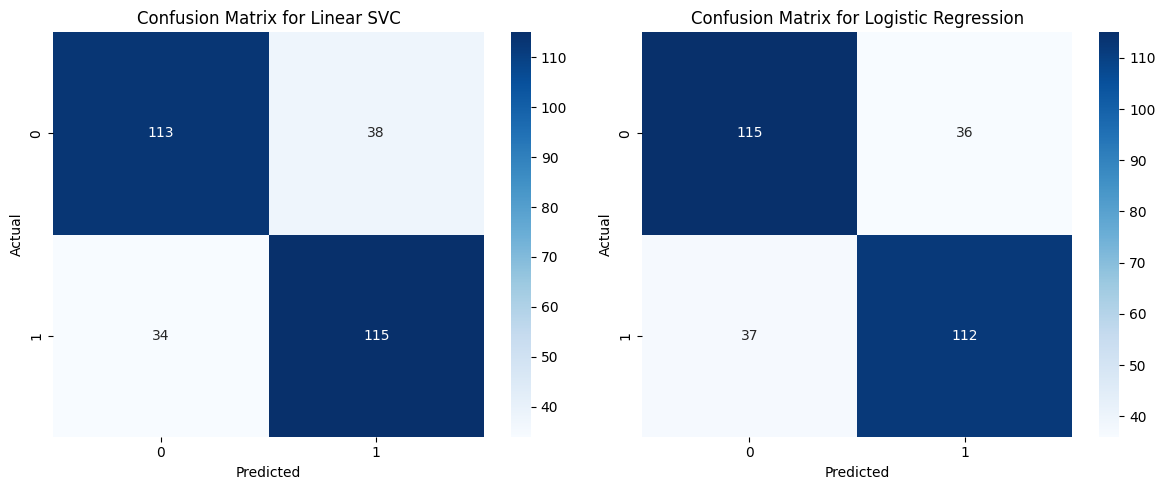

In [44]:
# Plot confusion matrices for both models
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Linear SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [45]:
# Determine the best model
best_model = 'Linear SVC' if accuracy_svc > accuracy_lr else 'Logistic Regression'
print("\nThe best model is:", best_model)


The best model is: Linear SVC


In [46]:
# Calculate baseline accuracy
baseline_accuracy = y.value_counts().max() / y.shape[0]
print("Baseline accuracy (majority class prediction):", baseline_accuracy)

Baseline accuracy (majority class prediction): 0.505


In [47]:
# Check if the best model is better than the baseline
is_better_than_baseline = (accuracy_svc > baseline_accuracy) if best_model == 'Linear SVC' else (accuracy_lr > baseline_accuracy)
print("Is the best model better than the baseline?", is_better_than_baseline)


Is the best model better than the baseline? True


Yes Both the models are performing better than the baseline model which has the accuracy around 0.5